In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

In [2]:
bc = load_breast_cancer()

In [16]:
bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [18]:
ss = StandardScaler()
data_std = ss.fit_transform(bc.data)
x_train, x_test, y_train, y_test = train_test_split(data_std, bc.target, test_size=0.2)

In [46]:
data_input = Input((30,))
x = Dense(1, activation="sigmoid")(data_input)

In [47]:
model = Model(data_input, x)
model.compile("adam", loss="binary_crossentropy", metrics=["accuracy"])

In [56]:
model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/200
455/455 [==============================] - 1s 2ms/step - loss: 0.0868 - acc: 0.9890 - val_loss: 0.0896 - val_acc: 0.9825
Epoch 2/200
455/455 [==============================] - 0s 38us/step - loss: 0.0866 - acc: 0.9890 - val_loss: 0.0894 - val_acc: 0.9825
Epoch 3/200
455/455 [==============================] - 0s 41us/step - loss: 0.0865 - acc: 0.9890 - val_loss: 0.0893 - val_acc: 0.9825
Epoch 4/200
455/455 [==============================] - 0s 44us/step - loss: 0.0864 - acc: 0.9890 - val_loss: 0.0892 - val_acc: 0.9825
Epoch 5/200
455/455 [==============================] - 0s 45us/step - loss: 0.0862 - acc: 0.9890 - val_loss: 0.0891 - val_acc: 0.9825
Epoch 6/200
455/455 [==============================] - 0s 44us/step - loss: 0.0861 - acc: 0.9890 - val_loss: 0.0890 - val_acc: 0.9825
Epoch 7/200
455/455 [==============================] - 0s 44us/step - loss: 0.0860 - acc: 0.9890 - val_loss: 0.0889 - val_acc: 0.9825
Epoch 8/200
455/4

In [49]:
print("train score", model.evaluate(x_train, y_train)[1])
print("test score", model.evaluate(x_test, y_test)[1])

455/455 [==============================] - 0s 102us/step
train score 0.9582417582417583
114/114 [==============================] - 0s 122us/step
test score 0.9824561403508771


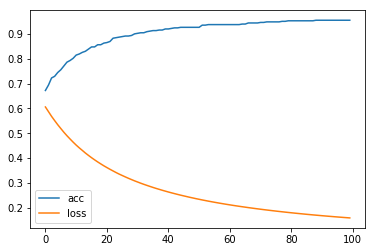

In [54]:

plt.plot(model.history.history['acc'], label="acc")
plt.plot(model.history.history['loss'], label="loss")
plt.legend()